# Company Data2015

In [109]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

Let us now go ahead and read the dataset and check the first five rows of the dataset.

#### Importing the dataset

In [110]:
Company = pd.read_excel('Company_Data2015-1.xlsx')

#Glimpse of Data
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [111]:
Company=Company.drop(['Co_Code','Co_Name'],axis=1)

#### Fixing messy column names (containing spaces) for ease of use

In [112]:
Company.columns = Company.columns.str.strip().str.replace(' ', '_').str.replace('-', '_').str.replace('[', '').str.replace(']', '').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc')

#### Checking top 5 rows again

In [113]:
Company.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets/Liabilities,...,PBIDTM_percLatest,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output/Total_Assets,Value_of_Output/Gross_Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


Lets check for missing values in the dataset

In [114]:
Company.isnull().sum()

Networth_Next_Year                0
Equity_Paid_Up                    0
Networth                          0
Capital_Employed                  0
Total_Debt                        0
                               ... 
Debtors_Velocity_Days             0
Creditors_Velocity_Days           0
Inventory_Velocity_Days         103
Value_of_Output/Total_Assets      0
Value_of_Output/Gross_Block       0
Length: 65, dtype: int64

Lets treat these missing values with median (replacement with median eliminates impact of outliers in the treatment)

In [115]:
col=list(Company)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

Company = pd.DataFrame(imputer.fit_transform(Company))
Company.columns=col
Company.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets/Liabilities,...,PBIDTM_percLatest,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output/Total_Assets,Value_of_Output/Gross_Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,45.0,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-10.30,-39.74,-57.74,-57.74,-87.18,29.0,101.0,2.0,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97.0,558.0,0.0,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-3.33,-7.21,-48.13,-47.70,-51.58,93.0,63.0,2.0,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-295.55,-400.55,-845.88,379.79,274.79,3887.0,346.0,0.0,0.01,0.05


In [116]:
Company.isnull().sum()

Networth_Next_Year              0
Equity_Paid_Up                  0
Networth                        0
Capital_Employed                0
Total_Debt                      0
                               ..
Debtors_Velocity_Days           0
Creditors_Velocity_Days         0
Inventory_Velocity_Days         0
Value_of_Output/Total_Assets    0
Value_of_Output/Gross_Block     0
Length: 65, dtype: int64

Now, there are no missing values

In [117]:
# Checking for duplicates

dups = Company.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
Company[dups]

Number of duplicate rows = 0


,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets/Liabilities,...,PBIDTM_percLatest,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output/Total_Assets,Value_of_Output/Gross_Block


In [118]:
### Outlier detection & Treatment

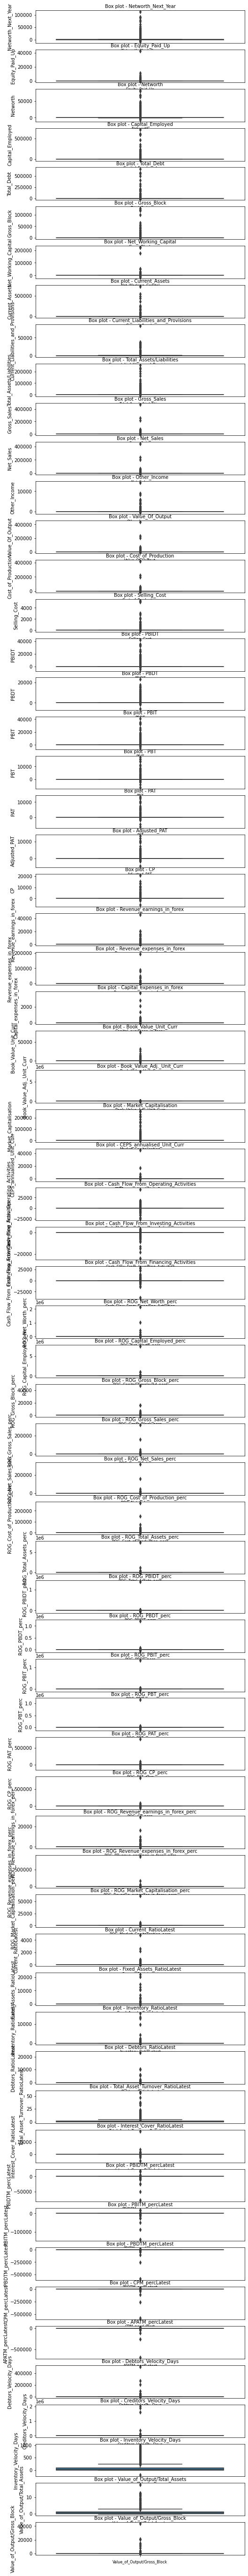

In [119]:
# Checking Outliers in dataset using boxplot // univariate analysis

col_names = list(Company.columns)
#col_names.remove('Num')
fig, ax = plt.subplots(len(col_names), figsize=(8,100))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=Company[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

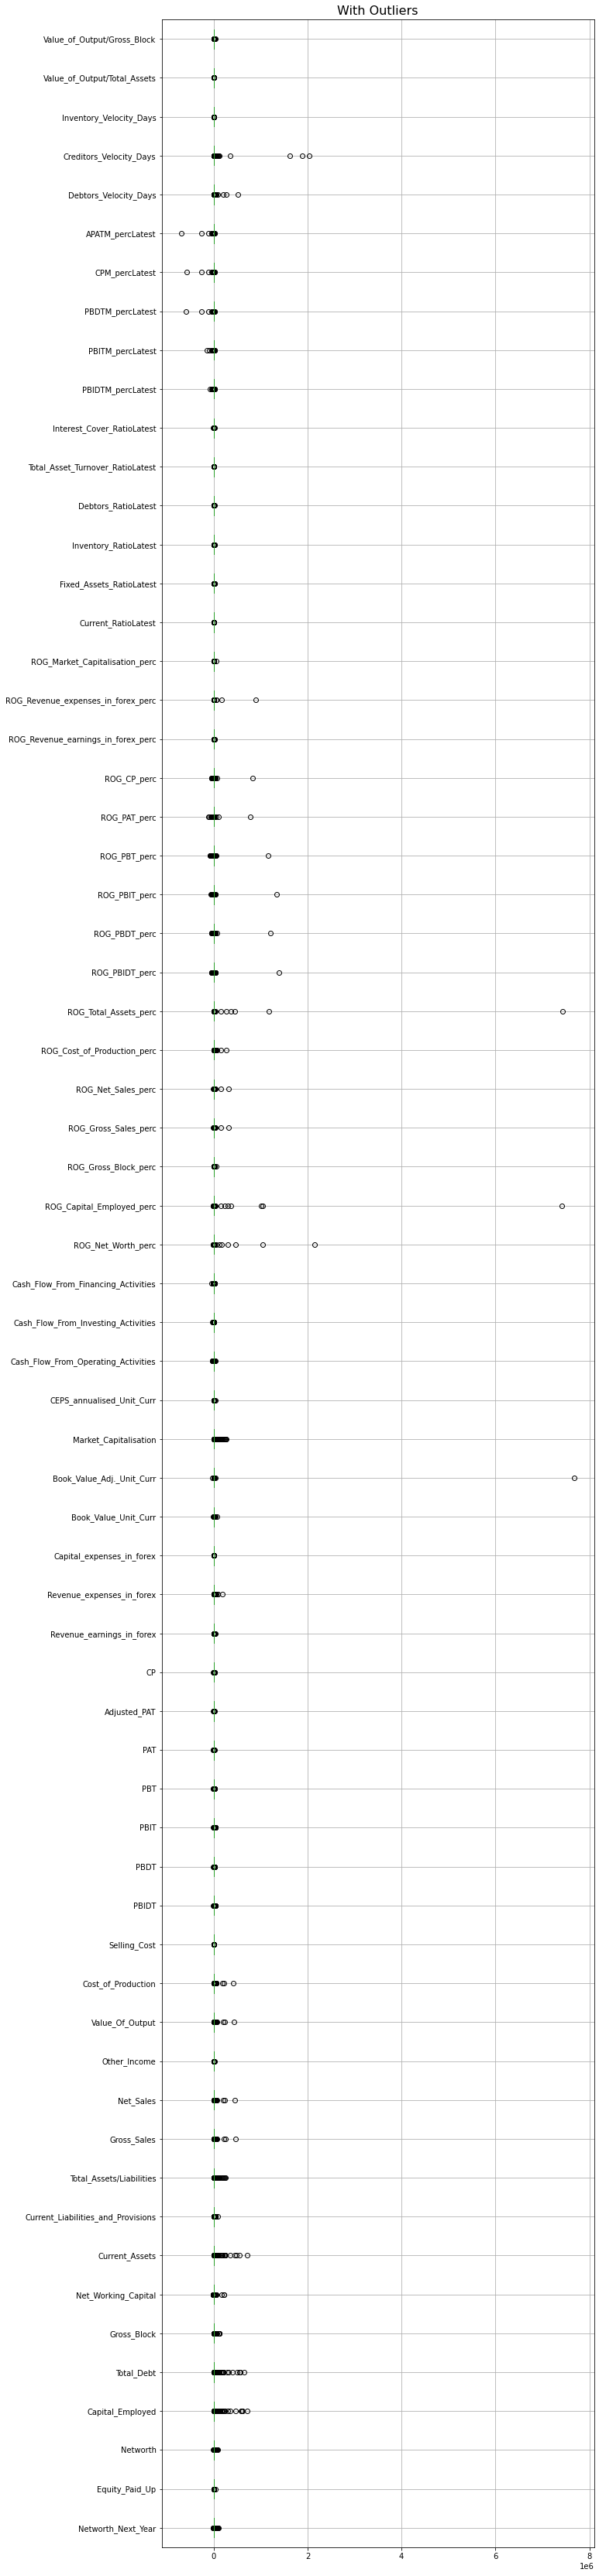

In [120]:
plt.figure(figsize=(10,60))
Company.boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [121]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [122]:
for i in Company:
    Company[i]=treat_outlier(Company[i])

-17.445 3.985 123.80250000000001 1978.8225000000002 <built-in function min> <built-in function max>
0.5 3.75 19.517500000000002 131.24 <built-in function min> <built-in function max>
-11.697499999999998 3.8925 117.2975 1829.0825 <built-in function min> <built-in function max>
0.4225 7.602499999999999 226.60500000000002 3634.915 <built-in function min> <built-in function max>
0.0 0.03 72.35000000000001 1572.61 <built-in function min> <built-in function max>
0.0 0.57 131.895 1409.325 <built-in function min> <built-in function max>
-11.944999999999999 0.9424999999999999 61.175 827.735 <built-in function min> <built-in function max>
0.14 4.0 135.2775 2014.74 <built-in function min> <built-in function max>
0.02 0.7324999999999999 65.65 1021.03 <built-in function min> <built-in function max>
1.22 10.555 310.54 4568.7300000000005 <built-in function min> <built-in function max>
0.0 1.4425000000000001 242.25 2845.3725 <built-in function min> <built-in function max>
0.0 1.44 234.44000000000003 2

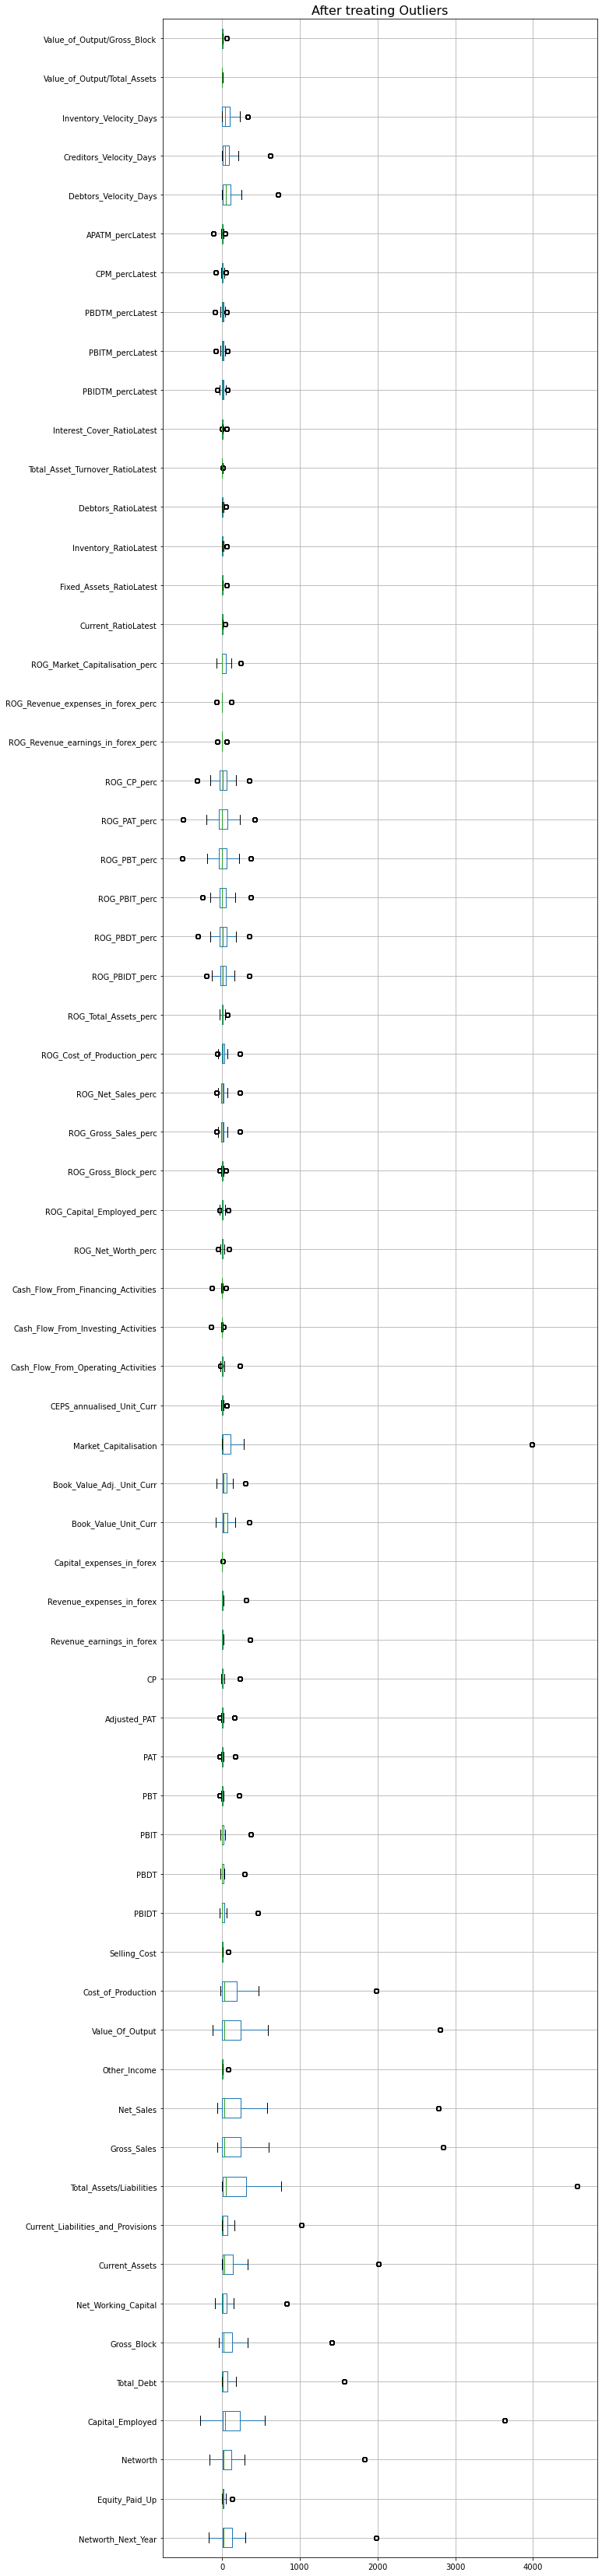

In [123]:
plt.figure(figsize=(10,60))
Company.boxplot(vert=0)
plt.title('After treating Outliers',fontsize=16)
plt.show()

Transforming Target variable 'Networth_Next_Year' into 1 & 0

In [124]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

In [125]:
Company[['default','Networth_Next_Year']].head()

,default,Networth_Next_Year
0,1,-17.445
1,1,-17.445
2,1,-17.445
3,1,-17.445
4,1,-17.445


In [126]:
Company["default"].value_counts()

0    3198
1     388
Name: default, dtype: int64

Average default rate matches with overall default rate of 10.8%.

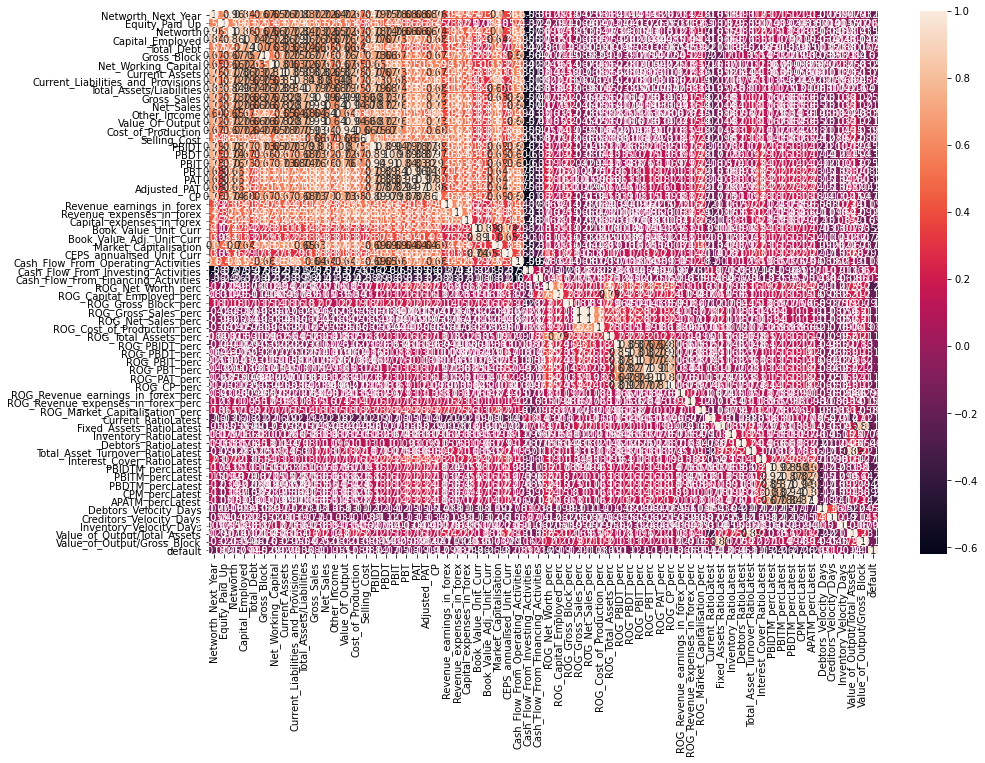

In [20]:
# Correlation matrix 
cont_col = [col for col in Company.columns if Company.dtypes[col] != 'object']
corr =Company[cont_col].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.show()

Train Test Split

X = Company(['Market_Capitalisation','Equity_Paid_Up','ROG_Net_Worth_perc','Interest_Cover_RatioLatest','Cash_Flow_From_Investing_Activities','Debtors_RatioLatest','Debtors_Velocity_Days','Current_RatioLatest','Creditors_Velocity_Days','ROG_Cost_of_Production_perc','Inventory_Velocity_Days','ROG_Gross_Block_perc']
y = Company['default']

In [213]:
X = Company.drop(['default','Networth_Next_Year'], axis=1)
y = Company['default']

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=Company['default'])

Checking the dimensions of the training and test data

In [128]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (2402, 64)
X_test (1184, 64)
y_train (2402,)
y_test (1184,)


In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression Model

In [187]:
# Fit the Logistic Regression model
lgr = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
lgr.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   56.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [188]:
# Predicting on Training and Test dataset
ytrain_predict = lgr.predict(X_train)
ytest_predict = lgr.predict(X_test)

In [189]:
# Getting the Predicted Classes and Probs
ytest_predict_prob=lgr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.030965,9.690352e-01
1,1.000000,1.063109e-27
2,1.000000,2.806887e-10
3,0.999337,6.628946e-04
4,0.999480,5.197297e-04


# Model Evaluation

In [195]:
# Accuracy - Test Data
lgr_train_acc=lgr.score(X_train, y_train)
print("Accuracy score of train data is",lgr_train_acc)

Accuracy score of train data is 0.9596169858451291


In [196]:
# Confusion Matrix for the training data
confusion_matrix(y_train, ytrain_predict)

array([[2119,   23],
       [  74,  186]], dtype=int64)

In [197]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2142
           1       0.89      0.72      0.79       260

    accuracy                           0.96      2402
   macro avg       0.93      0.85      0.89      2402
weighted avg       0.96      0.96      0.96      2402



In [198]:
lgr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lgr_metrics).transpose()
lgr_train_precision=round(df.loc["1"][0],2)
lgr_train_recall=round(df.loc["1"][1],2)
lgr_train_f1=round(df.loc["1"][2],2)
print ('lgr_train_precision ',lgr_train_precision)
print ('lgr_train_recall ',lgr_train_recall)
print ('lgr_train_f1 ',lgr_train_f1)

lgr_train_precision  0.89
lgr_train_recall  0.72
lgr_train_f1  0.79


# AUC and ROC for the train data

Area under Curve is 0.8523234934999642


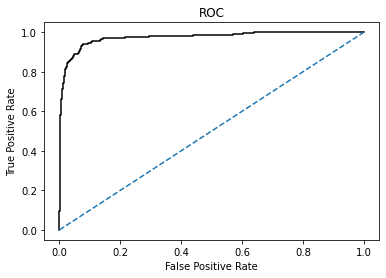

In [199]:
lgr_train_fpr, lgr_train_tpr,_=roc_curve(y_train,lgr.predict_proba(X_train)[:,1])
plt.plot(lgr_train_fpr,lgr_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lgr_train_auc=roc_auc_score(y_train,lgr.predict(X_train))
print('Area under Curve is', lgr_train_auc)

In [200]:
# Accuracy - Test Data
lgr_test_acc=lgr.score(X_test, y_test)
print("Accuracy score of test data is",lgr_test_acc)

Accuracy score of test data is 0.950168918918919


In [201]:
# Confusion Matrix for the test data
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[1034,   22],
       [  37,   91]], dtype=int64)

In [202]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1056
           1       0.81      0.71      0.76       128

    accuracy                           0.95      1184
   macro avg       0.89      0.85      0.86      1184
weighted avg       0.95      0.95      0.95      1184



In [203]:
lgr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lgr_metrics).transpose()
lgr_test_precision=round(df.loc["1"][0],2)
lgr_test_recall=round(df.loc["1"][1],2)
lgr_test_f1=round(df.loc["1"][2],2)
print ('lgr_test_precision ',lgr_test_precision)
print ('lgr_test_recall ',lgr_test_recall)
print ('lgr_test_f1 ',lgr_test_f1)

lgr_test_precision  0.81
lgr_test_recall  0.71
lgr_test_f1  0.76


# AUC and ROC for the test data

Area under Curve is 0.8450520833333334


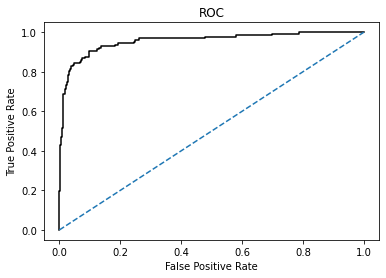

In [204]:
lgr_test_fpr, lgr_test_tpr,_=roc_curve(y_test,lgr.predict_proba(X_test)[:,1])
plt.plot(lgr_test_fpr,lgr_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lgr_test_auc=roc_auc_score(y_test,lgr.predict(X_test))
print('Area under Curve is', lgr_test_auc)

In [ ]:
# Conclusion

Accuracy on Test data is 95% and on Train data is 96%.
AUC-ROC score of test data are 85%.
Recall(71-72) and Precision(81-89) is moderate and nearly same on given data.
It is a better model to predict.

# Random Forest Classifier

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [131]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

In [132]:
rfcl = RandomForestClassifier()

In [133]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [134]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [135]:
grid_search.best_params_

{'max_depth': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 45,
 'n_estimators': 50}

In [136]:
best_grid = grid_search.best_estimator_

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores[feature_scores > 0.01]

In [137]:
ytrain_predict =best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [138]:
# Getting the Predicted Classes and Probs
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.220473,0.779527
1,0.991461,0.008539
2,0.989794,0.010206
3,0.900165,0.099835
4,0.992376,0.007624


# Model Evaluation

In [212]:
from sklearn.model_selection import cross_val_score
clfCVRF = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(clfCVRF, X_train, y_train, cv=10)
np.mean(scores)

0.9754287690179806

In [161]:
# Accuracy - Training Data
rf_train_acc=grid_search.score(X_train, y_train)
rf_train_acc

0.9779350541215653

In [162]:
# Confusion Matrix for the training data
confusion_matrix(y_train, ytrain_predict)

array([[2120,   22],
       [  31,  229]], dtype=int64)

In [163]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2142
           1       0.91      0.88      0.90       260

    accuracy                           0.98      2402
   macro avg       0.95      0.94      0.94      2402
weighted avg       0.98      0.98      0.98      2402



In [164]:
print("Company train data")
rf_train_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_train_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)


Company train data
rf_train_precision  0.91
rf_train_recall  0.88
rf_train_f1  0.9


# AUC and ROC for the training data

Area under Curve Train data 0.9352492278962867


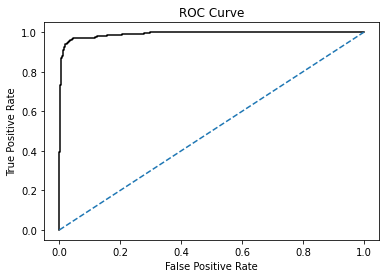

In [165]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,grid_search.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
rf_train_auc=roc_auc_score(y_train,grid_search.predict(X_train))
print('Area under Curve Train data', rf_train_auc)

In [166]:
# Accuracy - Test Data
rf_test_acc=grid_search.score(X_test, y_test)
rf_test_acc

0.981418918918919

In [167]:
# Confusion Matrix for test data
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[1052,    4],
       [  18,  110]], dtype=int64)

In [168]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1056
           1       0.96      0.86      0.91       128

    accuracy                           0.98      1184
   macro avg       0.97      0.93      0.95      1184
weighted avg       0.98      0.98      0.98      1184



In [169]:
print("Company Test data")
rf_test_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_test_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

Company Test data
rf_test_precision  0.96
rf_test_recall  0.86
rf_test_f1  0.91


# AUC and ROC for the test data

Area under Curve -Test data 0.9277935606060606


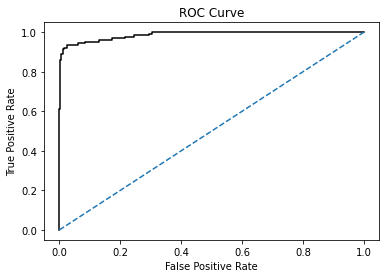

In [170]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,grid_search.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
rf_test_auc=roc_auc_score(y_test,grid_search.predict(X_test))
print('Area under Curve -Test data', rf_test_auc)

In [ ]:
Conclusion

Accuracy on Test data is 98% and on Train data is 98%(same)
AUC-ROC score of test data is 94% and train data is 93%. 
Recall(88-86) and Precision(96-91) of class 1 is nearly same for test and train data.
Certainly, best model for predicting as results are almost similar between training and test sets.

# Linear Discriminant Analysis(LDA) Model

In [171]:
lda = LinearDiscriminantAnalysis()
ldam=lda.fit(X_train,y_train)

In [172]:
ldam

LinearDiscriminantAnalysis()

In [173]:
# Predicting on Training and Test dataset
ytrain_predict = ldam.predict(X_train)
ytest_predict = ldam.predict(X_test)

In [174]:
# Getting the Predicted Classes and Probs
ytest_predict_prob=ldam.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.954211,0.045789
1,0.996401,0.003599
2,0.991203,0.008797
3,0.952458,0.047542
4,0.998640,0.001360


# Model Evaluation

In [176]:
# Accuracy - Training Data
ldam_train_acc=ldam.score(X_train, y_train)
print("Accuracy score of training data is",ldam_train_acc)

Accuracy score of training data is 0.9188176519567027


In [177]:
# Confusion Matrix for the training data
confusion_matrix(y_train, ytrain_predict)

array([[2104,   38],
       [ 157,  103]], dtype=int64)

In [178]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      2142
           1       0.73      0.40      0.51       260

    accuracy                           0.92      2402
   macro avg       0.83      0.69      0.73      2402
weighted avg       0.91      0.92      0.91      2402



In [179]:
ldam_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(ldam_metrics).transpose()
ldam_train_precision=round(df.loc["1"][0],2)
ldam_train_recall=round(df.loc["1"][1],2)
ldam_train_f1=round(df.loc["1"][2],2)
print ('ldam_train_precision ',ldam_train_precision)
print ('ldam_train_recall ',ldam_train_recall)
print ('ldam_train_f1 ',ldam_train_f1)

ldam_train_precision  0.73
ldam_train_recall  0.4
ldam_train_f1  0.51


# AUC and ROC for the training data

Area under Curve is 0.6892067083243553


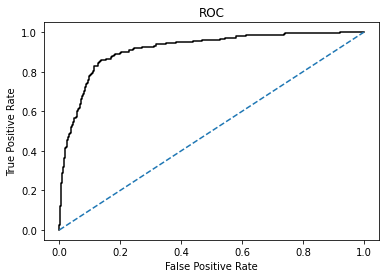

In [180]:
ldam_train_fpr, ldam_train_tpr,_=roc_curve(y_train,ldam.predict_proba(X_train)[:,1])
plt.plot(ldam_train_fpr,ldam_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
ldam_train_auc=roc_auc_score(y_train,ldam.predict(X_train))
print('Area under Curve is', ldam_train_auc)

In [181]:
# Accuracy - Test Data
ldam_test_acc=ldam.score(X_test, y_test)
print("Accuracy score of test data is",ldam_test_acc)

Accuracy score of test data is 0.910472972972973


In [182]:
# Confusion Matrix for the test data
confusion_matrix(y_test, ytest_predict)

array([[1028,   28],
       [  78,   50]], dtype=int64)

In [183]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1056
           1       0.64      0.39      0.49       128

    accuracy                           0.91      1184
   macro avg       0.79      0.68      0.72      1184
weighted avg       0.90      0.91      0.90      1184



In [184]:
ldam_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(ldam_metrics).transpose()
ldam_test_precision=round(df.loc["1"][0],2)
ldam_test_recall=round(df.loc["1"][1],2)
ldam_test_f1=round(df.loc["1"][2],2)
print ('ldam_test_precision ',ldam_test_precision)
print ('ldam_test_recall ',ldam_test_recall)
print ('ldam_test_f1 ',ldam_test_f1)

ldam_test_precision  0.64
ldam_test_recall  0.39
ldam_test_f1  0.49


# AUC and ROC for the test data

Area under Curve is 0.6820549242424242


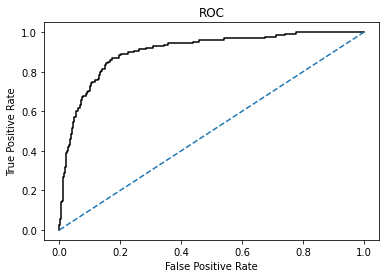

In [185]:
ldam_test_fpr, ldam_test_tpr,_=roc_curve(y_test,ldam.predict_proba(X_test)[:,1])
plt.plot(ldam_test_fpr,ldam_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
ldam_test_auc=roc_auc_score(y_test,ldam.predict(X_test))
print('Area under Curve is', ldam_test_auc)

In [ ]:
# Conclusion

Accuracy on Test data is 91% and on Train data is 92%.
Recall(39-40) and Precision(64-73) of class 1 is nearly same for test and train data and results shows that
it has low predicting power. Also, AUC-ROC values - 69% of both train and test results proves that it has low discretionary
power. Thus it is a poor model to predicit the results.

In [205]:
# Comparison of the performance metrics from the 3 models

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Regression Train':[lgr_train_acc,lgr_train_auc,lgr_train_recall,lgr_train_precision,lgr_train_f1],
        'Logistic Regression Test':[lgr_test_acc,lgr_test_auc,lgr_test_recall,lgr_test_precision,lgr_test_f1],
         'Random Classifier Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Classifier Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],            
        'LDA Train':[ldam_train_acc,ldam_train_auc,ldam_train_recall,ldam_train_precision,ldam_train_f1],
        'LDA Test':[ldam_test_acc,ldam_test_auc,ldam_test_recall,ldam_test_precision,ldam_test_f1]},index=index)
round(data,2)

,Logistic Regression Train,Logistic Regression Test,Random Classifier Train,Random Classifier Test,LDA Train,LDA Test
Accuracy,0.96,0.95,0.98,0.98,0.92,0.91
AUC,0.85,0.85,0.94,0.93,0.69,0.68
Recall,0.72,0.71,0.88,0.86,0.40,0.39
Precision,0.89,0.81,0.91,0.96,0.73,0.64
F1 Score,0.79,0.76,0.90,0.91,0.51,0.49


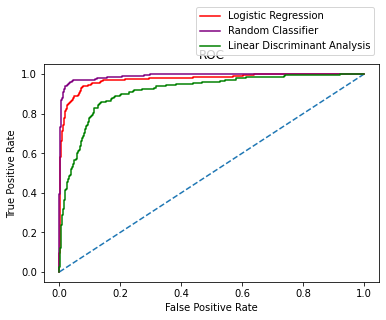

In [209]:
# ROC Curve for the 3 models on the Training data

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lgr_train_fpr, lgr_train_tpr,color='red',label="Logistic Regression")
plt.plot(rf_train_fpr, rf_train_tpr,color='purple',label="Random Classifier")
plt.plot(ldam_train_fpr,ldam_train_tpr,color='green',label="Linear Discriminant Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

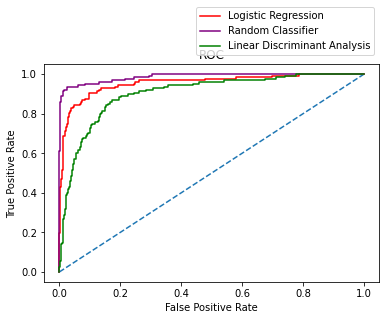

In [208]:
# ROC Curve for the 2 models on the Test data

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lgr_test_fpr, lgr_test_tpr,color='red',label="Logistic Regression")
plt.plot(rf_test_fpr, rf_test_tpr,color='purple',label="Random Classifier")
plt.plot(ldam_test_fpr,ldam_test_tpr,color='green',label="Linear Discriminant Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [ ]:
Final conclusion:
AUC-ROC is particularly helpful in comparing two or more competing models. The model with higher AUC-ROC is expected 
to have better discretionary power.
The closer the ROC curve comes to the top left corner of the probability space, the more area it covers; hence the better
is the model. Thus based on the outcomes, Random Forest Classifier model performs better than Logistic Regression and LDA model.
Also, based on recall and Accuracy, RF model have good predicting power than other models for this dataset.

In [211]:
from sklearn.metrics import mean_squared_error
print("Logistic regression MSE:",mean_squared_error(y_test, lgr.predict(X_test)))
print(" LDA MSE:", mean_squared_error(y_test, ldam.predict(X_test)))
print("Random Forest MSE:", mean_squared_error(y_test, best_grid.predict(X_test)))

Logistic regression MSE: 0.04983108108108108
 LDA MSE: 0.08952702702702703
Random Forest MSE: 0.018581081081081082


In [ ]:
RF classfier model has least mean squared error than other 2 models.